In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
# Import data
with open("../../data/hd-219666.csv") as f:
    data = pd.read_csv(f)

data.rename(columns={"julian_date": "time"}, inplace=True)

In [52]:
data

,flux,time
0,1.001019,1325.299510
1,0.999426,1325.300899
2,0.999607,1325.302288
3,0.999567,1325.303677
4,1.000448,1325.305066
...,...,...
18272,0.999656,1353.174670
18273,1.001374,1353.176059
18274,0.999186,1353.177448
18275,0.999985,1353.178836


In [66]:
# Remove insignificant datapoints (i.e., < 1.98 std deviations from the mean)

significant_data = data[
    # test for significance and that it's less than 1
    data["flux"].mean() - data["flux"] > data["flux"].std() * 2.512
]

significant_data

,flux,time
485,0.997787,1325.974523
2058,0.997899,1328.181508
2762,0.997752,1329.163469
2766,0.997498,1329.169025
2768,0.997435,1329.171803
...,...,...
14852,0.997838,1347.333038
14853,0.997939,1347.334427
14857,0.997405,1347.339983
15415,0.997840,1348.581645


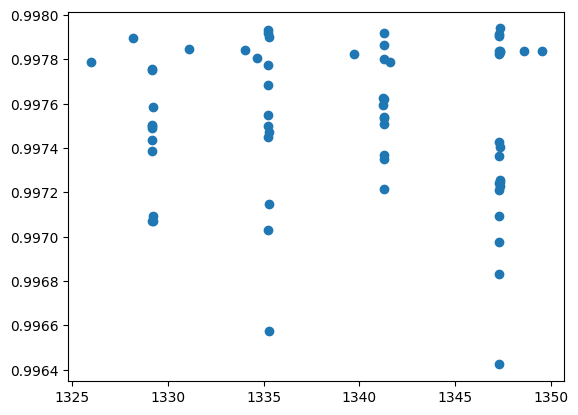

In [67]:
plt.scatter(significant_data["time"], significant_data["flux"])
plt.show()

In [68]:
sig_data_sorted = significant_data.sort_values(by="time")
sig_data_sorted

,flux,time
485,0.997787,1325.974523
2058,0.997899,1328.181508
2762,0.997752,1329.163469
2766,0.997498,1329.169025
2768,0.997435,1329.171803
...,...,...
14852,0.997838,1347.333038
14853,0.997939,1347.334427
14857,0.997405,1347.339983
15415,0.997840,1348.581645


In [69]:
# Group transits
# While the next datapoint is less than MAX_TIME, keep adding datapoints to the group
# Only the lowest datapoint in the group is retained, since that is the peak of the transit

MAX_TIME = 0.3  # 0.3 days between datapoints max, before a new group starts
grouped_times = []
grouped_fluxes = []

last_row = None
lowest_flux = 100
lowest_flux_time = 0

for index, row in sig_data_sorted.iterrows():
    if last_row is None:
        last_row = row
        continue
    
    if row["flux"] < lowest_flux:
        lowest_flux = row["flux"]
        lowest_flux_time = row["time"]
    
    if row["time"] - last_row["time"] > MAX_TIME:
        grouped_fluxes.append(lowest_flux)
        grouped_times.append(lowest_flux_time)
        
        lowest_flux = 100
        lowest_flux_time = 0
    
    last_row = row

grouped_data = pd.DataFrame({"flux": grouped_fluxes, "time": grouped_times})

In [70]:
grouped_data

,flux,time
0,0.997899,1328.181508
1,0.997752,1329.163469
2,0.997070,1329.187081
3,0.997841,1334.023261
4,0.997807,1334.626046
5,0.997934,1335.202442
6,0.996575,1335.259387
7,0.997594,1341.242763
8,0.997213,1341.285818
9,0.997426,1347.277483


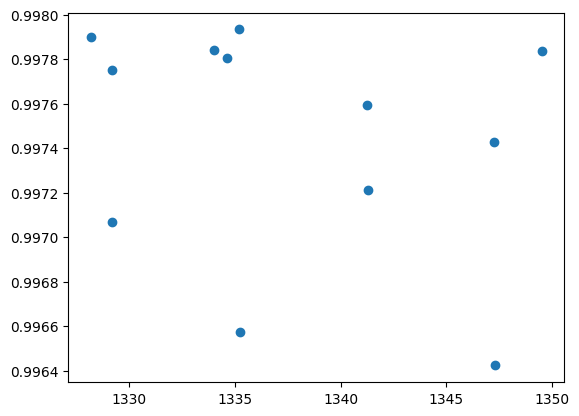

In [71]:
plt.scatter(grouped_data["time"], grouped_data["flux"])
plt.show()